# Machine Learning - Logistic Regression and Evaluation of Classification Algorithm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# load data
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)

In [ ]:
# show iris dataset
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# show unique labels
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# get only iris-setosa and iris-versicolor
new_df =df[(df[4] == "Iris-setosa")|(df[4]=="Iris-virginica")]
new_df.head(2)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [ ]:
# change the label to 0 and 1
new_df.replace("Iris-setosa", 0, inplace=True)
new_df.replace("Iris-virginica", 1, inplace=True)

<ipython-input-25-0956c431b88d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace("Iris-setosa", 0, inplace=True)
<ipython-input-25-0956c431b88d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace("Iris-virginica", 1, inplace=True)


In [ ]:
# shuffle data
new_df = new_df.sample(frac=1, random_state = 23)
new_df

,0,1,2,3,4
26,5.0,3.4,1.6,0.4,0
130,7.4,2.8,6.1,1.9,1
132,6.4,2.8,5.6,2.2,1
118,7.7,2.6,6.9,2.3,1
127,6.1,3.0,4.9,1.8,1
...,...,...,...,...,...
31,5.4,3.4,1.5,0.4,0
104,6.5,3.0,5.8,2.2,1
123,6.3,2.7,4.9,1.8,1
40,5.0,3.5,1.3,0.3,0


In [ ]:
# get training data / test data
n_train = round(len(new_df) * 0.8) # 반올림까지!
print(n_train) # 전체가 100개니깐 우리는 80개가 나온다.

# get training data
train_df = new_df.iloc[:n_train]

# get test data
test_df = new_df.iloc[n_train:]

80


In [ ]:
# make train_df and test_df to numpy arrays
train_df = train_df.to_numpy()
test_df = test_df.to_numpy()

In [ ]:
# data: X and predictor variable y
#
train_x = train_df[:, :4]
train_y = train_df[:, 4]
test_x = test_df[:, :4]
test_y = test_df[:, 4]

In [ ]:
# augment X with 1's in the leftmost column
train_x = np.insert(train_x, 0, 1, axis=1)
test_x = np.insert(test_x, 0, 1, axis=1)


In [ ]:
# simple sigmoid function
def sigmoid_func(z):
  '''
  z: real value
  '''
  return 1/(1 + np.exp(-z))

In [ ]:
# test sigmoid function
print(sigmoid_func(0))
print(sigmoid_func(10.2))

0.5
0.9999628310628971


In [ ]:
# our hypothesis function
def compute_logistic_func(theta, x):
  '''
  theta: w0, w1, ..., wn
  x: 1, x1, x2, ..., xn
  '''
  z = np.dot(theta, x)
  return sigmoid_func(z)

In [ ]:
# test logistic function
test_theta = np.random.rand(5)
compute_logistic_func(test_theta, train_x[1])

0.9997025673843636

In [ ]:
# compute gradient
def compute_jth_log_gradient(theta, j, X, y):
  '''
  theta = w0, w1, ..., wn
  j: jth feature
  X: data
  y: predictor variable
  '''
  # number of data: m
  m = len(X)

  dl_dw = 0
  for i in range(m):
    dl_dw += (y[i] - compute_logistic_func(theta, X[i])) * X[i][j]
  dl_dw *= 1/m
  return dl_dw


In [ ]:
# test gradient function
compute_jth_log_gradient(test_theta, 1, train_x, train_y)

-2.6074378978443202

In [ ]:
def cross_entropy(theta, X, y):
  '''
  theta = w0, w1, ..., wn
  X: data
  y: predictor variable
  '''
  # number of data: m
  m = len(X)

  cross = 0
  for i in range(m):
    cross += y[i] * np.log(compute_logistic_func(theta, X[i])) + (1 - y[i]) * np.log(1 - compute_logistic_func(theta, X[i]))
  cross *= 1/m

  return cross

In [ ]:
# test cross entropy function
cross_entropy(test_theta, train_x, train_y)

-2.4954035017656824

2교시 시작
: 알고리즘 따라 구현하기~


In [ ]:
# gradient descent for logistic regression
def logistic_gradient_ascent(X, y, alpha):
  '''
  X: data
  y: predictor variable
  '''
  m = len(X)
  n = X.shape[1]

  iter = 200
  cross = [] # 사실은 로그 어쩌구

  # init. theta
  np.random.seed(23)
  theta = np.random.rand(n)

  for i in range(iter):
    cross.append(cross_entropy(theta, X, y))

    for j in range(n_train):
      theta[j] = theta[j] + alpha * compute_jth_log_gradient(theta, j, X, y)

  return theta, cross



In [ ]:
# gradient descent for logistic regression
def logistic_gradient_ascent(X, y, alpha):
  '''
  X: data
  y: predictor variable
  '''
  m = len(X)
  n = X.shape[1]

  iter = 200
  cross = []

  # init. theta
  np.random.seed(23)
  theta = np.random.rand(n)

  for i in range(iter):

    cross.append(cross_entropy(theta, X, y))

    for j in range(n):
      theta[j] = theta[j] + alpha * compute_jth_log_gradient(theta, j, X, y)

  return theta, cross

In [ ]:
# run logistic regression
theta, cross = logistic_gradient_ascent(train_x, train_y, alpha=0.01)

Text(0.5, 1.0, 'c')

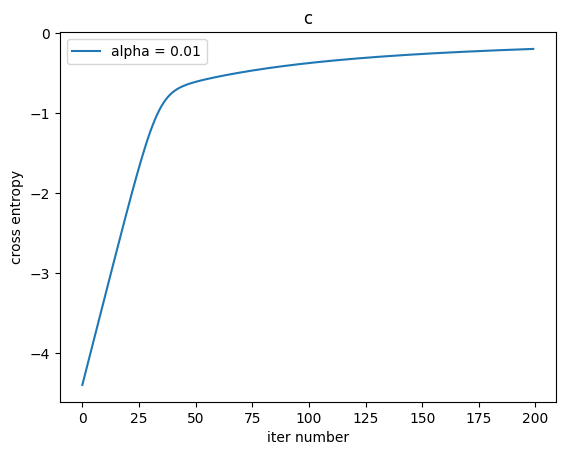

In [ ]:
# plot cross entropy
iter_list = list(range(len(cross)))
plt.plot(iter_list, cross, color='r')
# plt.plot(iter_list, cross, color='b')
# plt.plot(iter_list, cross, color='g')


# xlabel, ylabel, legend, title
plt.xlabel("iter number")
plt.ylabel("cross entropy")
plt.legend(["alpha = 0.01"])
plt.title("c")

Text(0.5, 1.0, 'cross entropy of logistic regression')

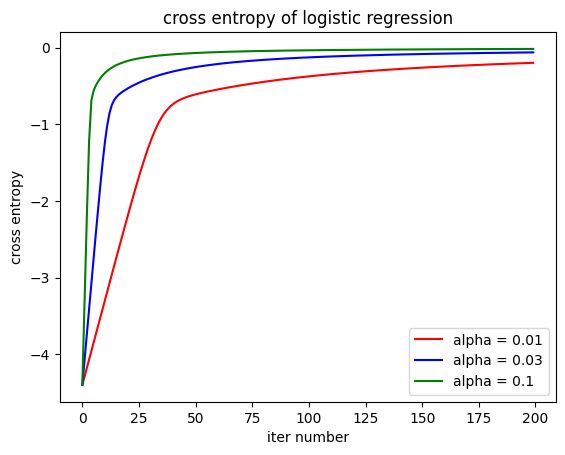

In [ ]:
## TRY
# train with different alpha (0.01, 0.03, 0.1)
theta1, cross1 = logistic_gradient_ascent(train_x, train_y, alpha=0.01)
theta2, cross2 = logistic_gradient_ascent(train_x, train_y, alpha=0.03)
theta3, cross3 = logistic_gradient_ascent(train_x, train_y, alpha=0.1)


# plot cross entropy
iter_list1 = list(range(len(cross1)))
iter_list2 = list(range(len(cross2)))
iter_list3 = list(range(len(cross3)))

plt.plot(iter_list1, cross1, color='r')
plt.plot(iter_list2, cross2, color='b')
plt.plot(iter_list3, cross3, color='g')

# xlabel, ylabel, legend, title
plt.xlabel("iter number")
plt.ylabel("cross entropy")
plt.legend(["alpha = 0.01","alpha = 0.03","alpha = 0.1"])
plt.title("cross entropy of logistic regression")

In [ ]:
# prediction with our optimal theta
y_pred = test_x @ theta
y_pred = sigmoid_func(y_pred)

In [ ]:
# print y_pred
y_pred

array([0.86809962, 0.87243112, 0.82977606, 0.84076326, 0.83469327,
       0.2029103 , 0.22169395, 0.23858352, 0.2238299 , 0.84799372,
       0.24229377, 0.86722877, 0.20279255, 0.81205461, 0.79231926,
       0.20466426, 0.88035555, 0.80340092, 0.189707  , 0.79474985])

In [ ]:
# predict label based on threshold
def pred_label(theta, test_x, threshold):

  y_pred = test_x @ theta
  y_pred = sigmoid_func(y_pred)

  # m = len(y_pred)
  n_test = len(test_x)
  y_pred_label = np.zeros(n_test)

  for i in range(n_test):
    if y_pred[i] >= threshold:
      y_pred_label[i] = 1
    else:
      y_pred_label[i] = 0

  return y_pred_label

In [ ]:
y_pred_label = pred_label(theta, test_x, threshold=0.5)
y_pred_label

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1.])

In [ ]:
test_y

array([1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1.])

In [ ]:
# create confusion matrix
def create_confusion_matrix(y_pred_label, test_y):
  # create conf_matrix
  conf_matrix = np.zeros((2,2))

  m = len(test_y)

  for i in range(m):
    if y_pred_label[i] == test_y[i]:
      if test_y[i] == 1:
        conf_matrix[0][0] += 1
      else:
        conf_matrix[1][1] += 1
    else:
      if test_y[i] == 1:
        conf_matrix[0][1] += 1
      else:
        conf_matrix[1][0] += 1

    '''
    for i in range(n_test):
    # TP
    if (y_pred_label[i] == 1) & (test_y[i] == 1):
      conf_matrix[0][0] += 1
    # FN
    elif (y_pred_label[i] == 0) & (test_y[i] == 1):
      conf_matrix[0][1] += 1
    # FP
    elif (y_pred_label[i] == 1) & (test_y[i] == 0):
      conf_matrix[1][0] += 1
    else:
      conf_matrix[1][1] += 1
    '''

  return conf_matrix

In [ ]:
conf_matrix = create_confusion_matrix(y_pred_label, test_y)

In [ ]:
conf_matrix

array([[12.,  0.],
       [ 0.,  8.]])

In [ ]:
def accuracy_logistic(conf_matrix):
  # acc = (conf_matrix[0][0]+conf_matrix[1][1]) / (conf_matrix[0][0]+conf_matrix[1][1]+conf_matrix[0][1]+conf_matrix[1][0])
  return (conf_matrix[0][0] + conf_matrix[1][1]) / conf_matrix.sum()

In [ ]:
accuracy_logistic(conf_matrix)

1.0

In [ ]:
def precision_logistic(conf_matrix):
  # return conf_matrix[0][0] / (conf_matrix[0][0]+conf_matrix[1][0])
  return conf_matrix[0][0] / conf_matrix[:, 0].sum()

In [ ]:
precision_logistic(conf_matrix)

1.0

In [ ]:
def recall_logistic(conf_matrix):
  # return conf_matrix[0][0] / (conf_matrix[0][0]+conf_matrix[0][1])
  return conf_matrix[0][0] / conf_matrix[0].sum()

In [ ]:
recall_logistic(conf_matrix)

1.0

In [ ]:
def f1_score(conf_matrix):
  P = precision_logistic(conf_matrix)
  R = recall_logistic(conf_matrix)
  return 2 * P * R / (P + R)

In [ ]:
f1_score(conf_matrix)

1.0

In [ ]:
def false_positive_logistic(conf_matrix):
  return conf_matrix[1][0] / conf_matrix[1].sum()

In [ ]:
false_positive_logistic(conf_matrix)

0.0

In [ ]:
# AUC curve
threshold = np.linspace(0, 1, 100)
tpr = []
fpr = []
for value in threshold:

  # prediction of y label
  y_pred_label = pred_label(theta, test_x, threshold=value)
  # create confusion matrix
  conf_matrix = create_confusion_matrix(y_pred_label, test_y)
  # tpr
  tpr.append(recall_logistic(conf_matrix))
  # fpr
  fpr.append(false_positive_logistic(conf_matrix))


(0.0, 1.0)

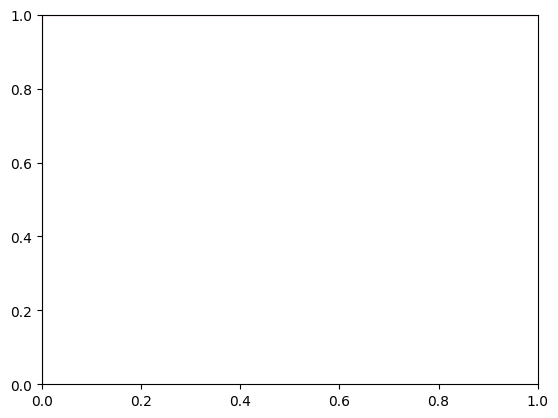

In [ ]:
plt.plot(fpr, tpr, color='r')

plt.xlim(0, 1)
plt.ylim(0, 1)